<a href="https://colab.research.google.com/github/CharlotteStiller/P1_MoneyBall_FIFA/blob/main/06_07_2021_FIFA_Project_CharlotteStiller_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. LOAD LIBARIES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

#NOTIZEN

# object - > int 
# weight 
# value €             
# wage  €            
# release_clause € 


# int - > data 
# joined     

# object - > date
# loan_date_end    
# contract  


# for column in df.columns:
#     print(column, df[column].unique())

#drop all the null values
#df.dropna(inplace = True)


#https://towardsdatascience.com/exploratory-data-analysis-of-the-fifa-19-dataset-in-python-24eb27de9e59



# 2. LOAD DATA  

In [6]:
#load the data from the csv file  

from google.colab import files
uploaded = files.upload()

df = pd.read_csv("fifa21_male2.csv")

Saving fifa21_male2.csv to fifa21_male2.csv


In [7]:
# check the first rows / values of the dataframe
df.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [8]:
# check the number of rows and columns 
df.shape

(17125, 107)

In [ ]:
# check the type of the dataframe 
df.info(type)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 107 columns):
 #   Column            Dtype  
---  ------            -----  
 0   ID                int64  
 1   Name              object 
 2   Age               int64  
 3   OVA               int64  
 4   Nationality       object 
 5   Club              object 
 6   BOV               int64  
 7   BP                object 
 8   Position          object 
 9   Player Photo      object 
 10  Club Logo         object 
 11  Flag Photo        object 
 12  POT               int64  
 13  Team & Contract   object 
 14  Height            object 
 15  Weight            object 
 16  foot              object 
 17  Growth            int64  
 18  Joined            object 
 19  Loan Date End     object 
 20  Value             object 
 21  Wage              object 
 22  Release Clause    object 
 23  Contract          object 
 24  Attacking         int64  
 25  Crossing          int64  
 26  Finishing        

In [ ]:
# column id is unique, so I passed it as the index
# df = df.set_index("ID")

# 3. CLEANING DATA

In [9]:
# 1. standardize the column names: lower the strings and replace a space with a underline 
df.columns = [column.lower().replace(' ', '_') for column in df.columns]
df.columns

Index(['id', 'name', 'age', 'ova', 'nationality', 'club', 'bov', 'bp',
       'position', 'player_photo',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'gender'],
      dtype='object', length=107)

3.1. Dealing with the null values


In [25]:
#check the missing values 
def null_counts(df):
    for col in df.columns:
        print(f"{col} : {df[col].isnull().sum()}")
null_counts(df)

id : 0
name : 0
age : 0
ova : 0
nationality : 0
club : 0
bov : 0
bp : 0
position : 0
player_photo : 0
club_logo : 23
flag_photo : 0
pot : 0
team_&_contract : 0
height : 0
weight : 0
foot : 0
growth : 0
joined : 58
loan_date_end : 16215
value : 0
wage : 0
release_clause : 0
contract : 0
attacking : 0
crossing : 0
finishing : 0
heading_accuracy : 0
short_passing : 0
volleys : 58
skill : 0
dribbling : 0
curve : 58
fk_accuracy : 0
long_passing : 0
ball_control : 0
movement : 0
acceleration : 0
sprint_speed : 0
agility : 58
reactions : 0
balance : 58
power : 0
shot_power : 0
jumping : 58
stamina : 0
strength : 0
long_shots : 0
mentality : 0
aggression : 0
interceptions : 7
positioning : 7
vision : 58
penalties : 0
composure : 423
defending : 0
marking : 0
standing_tackle : 0
sliding_tackle : 58
goalkeeping : 0
gk_diving : 0
gk_handling : 0
gk_kicking : 0
gk_positioning : 0
gk_reflexes : 0
total_stats : 0
base_stats : 0
w/f : 0
sm : 0
a/w : 89
d/w : 89
ir : 0
pac : 0
sho : 0
pas : 0
dri : 0


In [21]:
#In the column "club" there are 23 null values. I will replace them with one of the most commun columns. 
df.club.value_counts().head(5)
df['club'].fillna("Manchester United", inplace = True)

In [24]:
#replace the null values from the column "position with the most comunm collumn "
df.position.value_counts().head(5)
df['position'].fillna("CB", inplace = True) 

# 3.2. Droping Columns

In [ ]:
#Droping the following columns because they have no relevance for my analysis
player_photo : 0
club_logo : 23
flag_photo : 0

In [ ]:
#the weight column includes strings- we are not able to calculate with this values 
#drop the string values, convert the values to float and put them in a new column, so we don't loose the feet values .

def weight_n(i):
    if isinstance(i, str) and i.endswith('lbs'):
        return float(i[:-3])
    return float(i)
df['weight_num'] = df['weight'].apply(weight_n)
df['weight_num'].head()

0    181.0
1    143.0
2    161.0
3    165.0
4    150.0
Name: weight_num, dtype: float64

In [ ]:
#the height column contains feet object values - we are not able to calculate with this values 
#replace the feet values with cm values and put them in a new column, so we don't loose the feet values .

df['height'] = df['height'].astype(str)

In [ ]:
df['height_cm'] = df["height"].replace(['6\'0"', '5\'10"', '5\'9"', '5\'11"', '5\'7"', '5\'8"', '6\'2"', '6\'4"',
'6\'3"', '5\'6"', '6\'1"', '6\'6"', '5\'5"', '6\'5"', '6\'8"', '6\'7"', '5\'2"', '5\'4"', '5\'3"', '6\'9"',
'5\'1"'],["182.88", "177.80", "175.26", "180.34", "170.18", "172.72", "187.96", "193.04", "190.50", "167.64", "185.42", 
          "198.12", "165.10", "195.58", "203.20", "200.66", "157.48", "162.56", "160.02", "205.74", "154.94"])

In [ ]:
#converting the string cm values in float values  
df['height_cm'] = df['height_cm'].astype(float)
df['height_cm'].head()

0    182.88
1    177.80
2    175.26
3    180.34
4    170.18
Name: height_cm, dtype: float64

In [ ]:
# the value and wage column contains strings that we can't work with 
# first drop the strings and than multiplier the values by the means of the strings (like M = 000000)
# put the result in a new column, so we don't loose the original values

def money(s):
    if s.startswith('€'):
        s = s[1:]
    multiplier = None
    if s.endswith('M'):
        s = s[:-1]
        multiplier = 1e6
    elif s.endswith('B'):
        s = s[:-1]
        multiplier = 1e9
    elif s.endswith('K'):
        s = s[:-1]
        multiplier = 1e3
    f = float(s)
    if multiplier:
        f = f * multiplier
    return f

In [ ]:
df['value_num'] = df['value'].apply(money)
df['wage_num'] = df['wage'].apply(money)
df[['value_num', 'wage_num']].head()

,value_num,wage_num
0,625000.0,7000.0
1,600000.0,7000.0
2,1100000.0,15000.0
3,0.0,0.0
4,5500000.0,12000.0


In [ ]:
df.head()

,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,height_cm,value_numeric,value_num,wage_num,weight_num
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male,182.88,€625K,625000.0,7000.0,181.0
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male,177.80,€600K,600000.0,7000.0,143.0
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male,175.26,€1.1M,1100000.0,15000.0,161.0
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male,180.34,€0,0.0,0.0,165.0
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2

In [ ]:
rating_cols = "ls, st, rs, lw, lf, df, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rn, lwb, ldm, cdm, rdm, rwb, lb, lcb, cb, rcb, rb, gk".split(', ')
for col in rating_cols:
    df[[f"{col}1", f"{col}2"]]  = df[col].str.split('+', expand=True)
    df[f"{col}1"] = df[f"{col}1"].astype('float')
    df[f"{col}2"] = df[f"{col}2"].astype('float')
    df = df.drop(col, axis=1)
df.head()

SyntaxError: cannot assign to function call (<ipython-input-169-bf9108a29c2e>, line 3)

In [ ]:
# Contract numbers from strings in contract column and than handle the values with more than one year in it. 
# df

# 4. QUESTION 1: CORRELTAION HEIGHT + MARKETING VALUE

Mean:  181.22 cm
Maximum:  205.74 cm
Minimum:  154.94 cm
Standard Deviation:  6.89


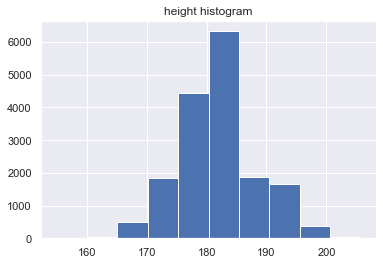

In [ ]:
def get_statistics(numeric_column_name):
    print("Mean: ".format(numeric_column_name),   round(df[numeric_column_name].mean(), 2), "cm")
    print("Maximum: ".format(numeric_column_name), round(df[numeric_column_name].max(), 2), "cm")
    print("Minimum: ".format(numeric_column_name), round(df[numeric_column_name].min(), 2), "cm")
    print("Standard Deviation: ".format(numeric_column_name), round(df[numeric_column_name].std(), 2))
    sns.set()
    plt.title("{} histogram".format(numeric_column_name))
    df[numeric_column_name].hist(bins = 10)
    
get_statistics('height')

In [ ]:
# remove duplicate, null values, 

SyntaxError: invalid syntax (<ipython-input-14-513c2d8bf7b7>, line 1)

# QUESTION 2: ARE THE TOP 10 PLAYERS FROM THE 10 MOST COMMUN NATIONALITIES

In [ ]:
#see if we have nationalities written differently

sorted(df['nationality'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua &amp; Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bolivia',
 'Bosnia Herzegovina',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China PR',
 'Chinese Taipei',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'DR Congo',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Faroe Islands',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Grenada',
 'Guam',
 'Guinea',
 'Guinea Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 '

In [ ]:
# there are player from DR Congo and Congo. Want to count them together, so I replance Congo with DR Congo 
df['nationality'] = df['nationality'].replace(['DR Congo'], 'Congo')

In [ ]:
top_country = pd.DataFrame(df['nationality'].value_counts().head(5))
top_country

,nationality
England,1707
Germany,1154
Spain,1121
France,990
Brazil,857


In [ ]:
top_country = top_country.rename_axis('country').reset_index()
top_country.reset_index(level=0, inplace=True)
top_country

,index,country,nationality
0,0,England,1707
1,1,Germany,1154
2,2,Spain,1121
3,3,France,990
4,4,Brazil,857
5,5,Argentina,778
6,6,Italy,565
7,7,Netherlands,475
8,8,Portugal,365
9,9,United States,358


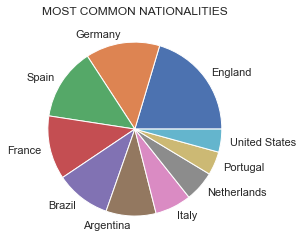

In [ ]:
x = top_country['nationality']
label = top_country["country"]
plt.title("MOST COMMON NATIONALITIES")
plt.pie(x, labels=label)
plt.show()

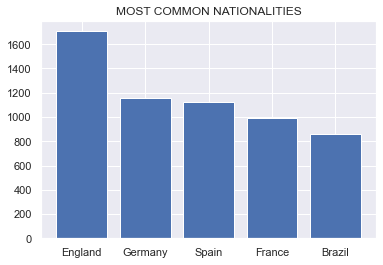

In [ ]:
from collections import Counter
bar_plot = dict(Counter(df['nationality'].values).most_common(5))
plt.bar(*zip(*bar_plot.items()))
plt.title("MOST COMMON NATIONALITIES")
plt.show()

# QUESTION 3: Is there a high correltation between age and value? 

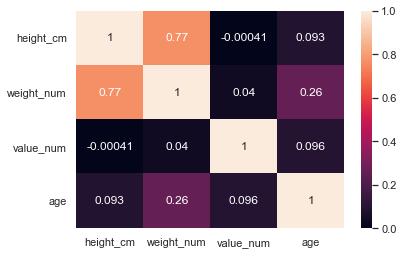

In [ ]:
numerical_columns = df[['height_cm', 'weight_num', 'value_num', 'age']]
sns.heatmap(numerical_columns.corr(), annot=True)
plt.show()

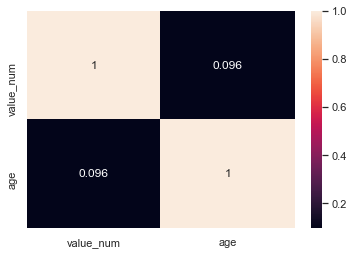

In [ ]:
num_columns = df[['value_num', 'age']]
sns.heatmap(num_columns.corr(), annot=True)
plt.show()

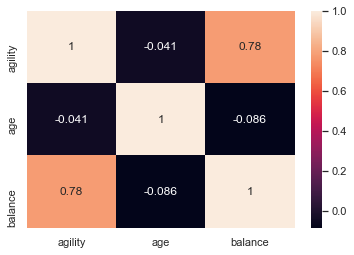

In [ ]:
n_columns = df[['agility', 'age', 'balance']]
sns.heatmap(n_columns.corr(), annot=True)
plt.show()

In [ ]:
df['body_type'].value_counts()

KeyError: 'body_type'

In [ ]:
df.to_csv('file123.csv')

# 4. Vizalization 

# 5. Fit the model 